# Project Name : University Admit Eligibility Predictor

# Project  ID :   PNT2022TMID46587

# Project Members : ABIMANYU S , ARIVUMATHI R , POOVARASAN R , VIGNESH B


# Importing The Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load The Dataset

In [ ]:
#from google.colab  import files
#uploaded =files.upload()

In [ ]:


df = pd.read_csv('Admission_Predict.csv')
df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
!pip install botocore

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Analyse The Data

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


# Drop The Serial No Column

In [ ]:
df.drop("Serial No.",axis=1,inplace=True)

In [ ]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# Checking For Null Value

In [ ]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# Getting Information About The Dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


# Statistical Summary Of The Dataframe

In [ ]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


# To Find The Correlation Of Columns

In [ ]:
corr_matrix=df.corr()

In [ ]:
corr_matrix

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


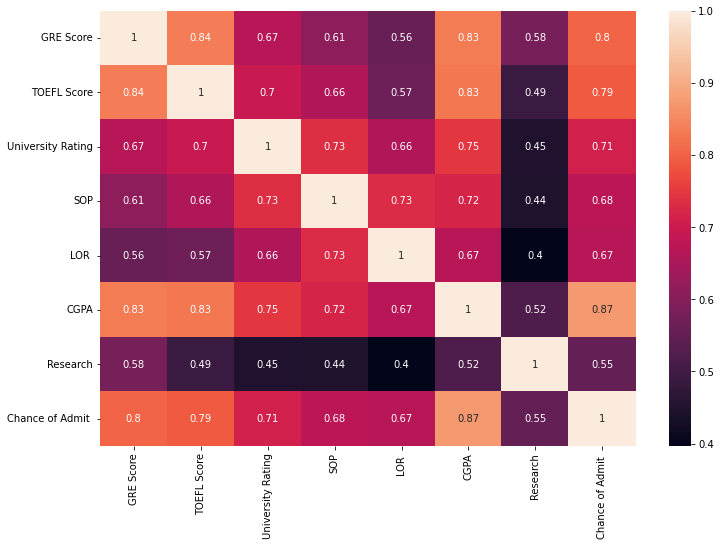

In [ ]:
#plotting the correlation matrix as a heatmap
fig = plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True)
plt.show()

# Data Visualization

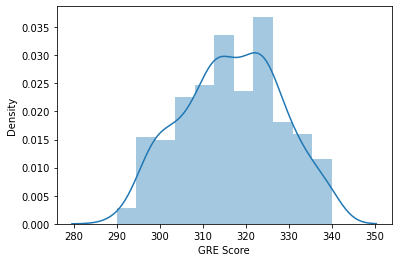

In [ ]:
sns.distplot(df["GRE Score"])

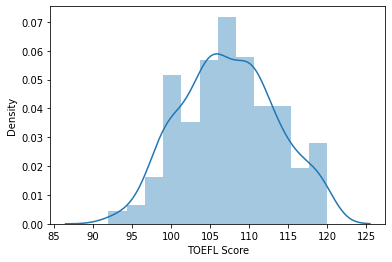

In [ ]:
sns.distplot(df["TOEFL Score"])

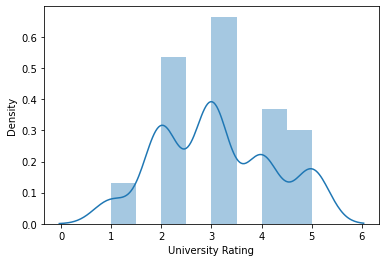

In [ ]:
sns.distplot(df["University Rating"])

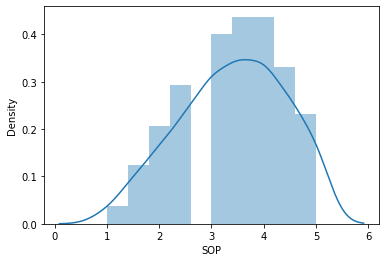

In [ ]:
sns.distplot(df["SOP"])

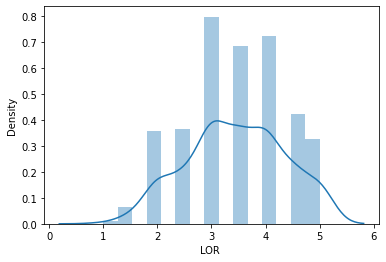

In [ ]:
sns.distplot(df["LOR "])

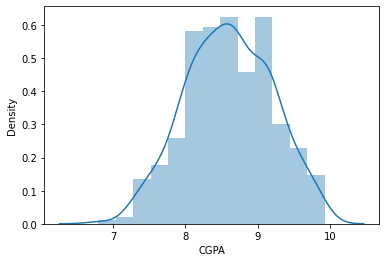

In [ ]:
sns.distplot(df["CGPA"])

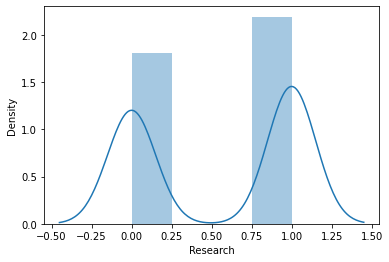

In [ ]:
sns.distplot(df["Research"])

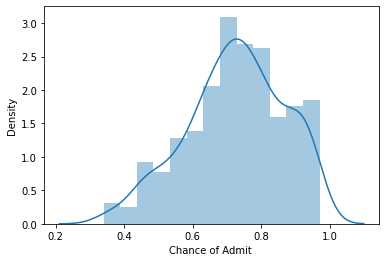

In [ ]:
sns.distplot(df["Chance of Admit "])

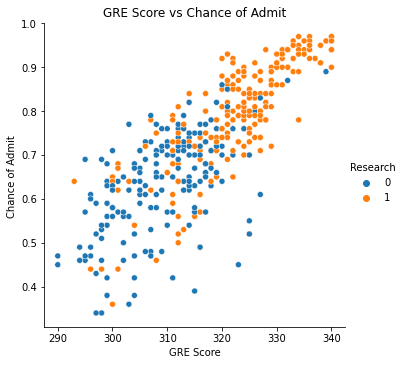

In [ ]:
sns.relplot(data=df,x="GRE Score",y="Chance of Admit ",hue="Research")
plt.title("GRE Score vs Chance of Admit")
plt.show()

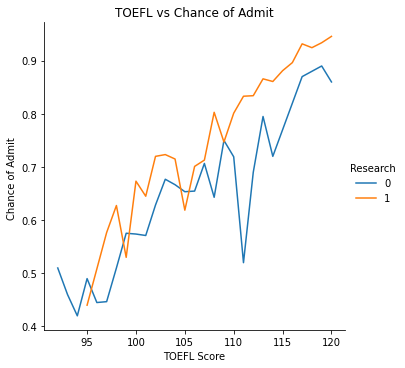

In [ ]:
sns.relplot(data=df,x="TOEFL Score",y="Chance of Admit ",hue="Research",kind="line",ci=None)
plt.title("TOEFL vs Chance of Admit")
plt.show()

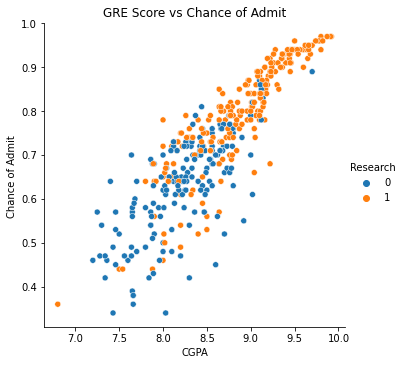

In [ ]:
sns.relplot(data=df,x="CGPA",y="Chance of Admit ",hue="Research")
plt.title("GRE Score vs Chance of Admit")
plt.show()

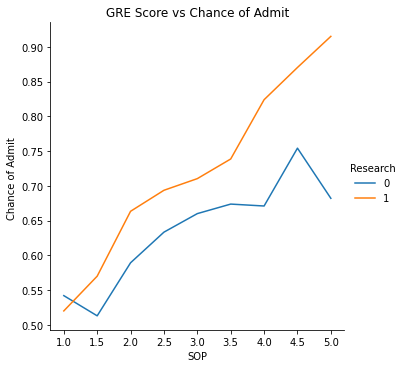

In [ ]:
sns.relplot(data=df,x="SOP",y="Chance of Admit ",hue="Research",kind="line",ci=None)
plt.title("GRE Score vs Chance of Admit")
plt.show()

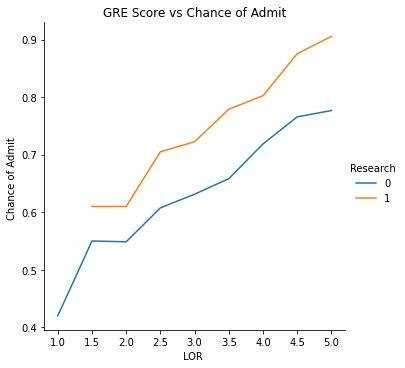

In [ ]:
sns.relplot(data=df,x="LOR ",y="Chance of Admit ",hue="Research",kind="line",ci=None)
plt.title("GRE Score vs Chance of Admit")
plt.show()

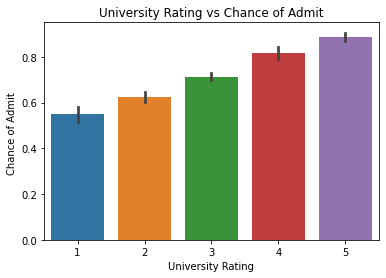

In [ ]:
sns.barplot(data=df,x="University Rating",y="Chance of Admit ")
plt.title("University Rating vs Chance of Admit")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbfe9d60210>,
      dtype=object)

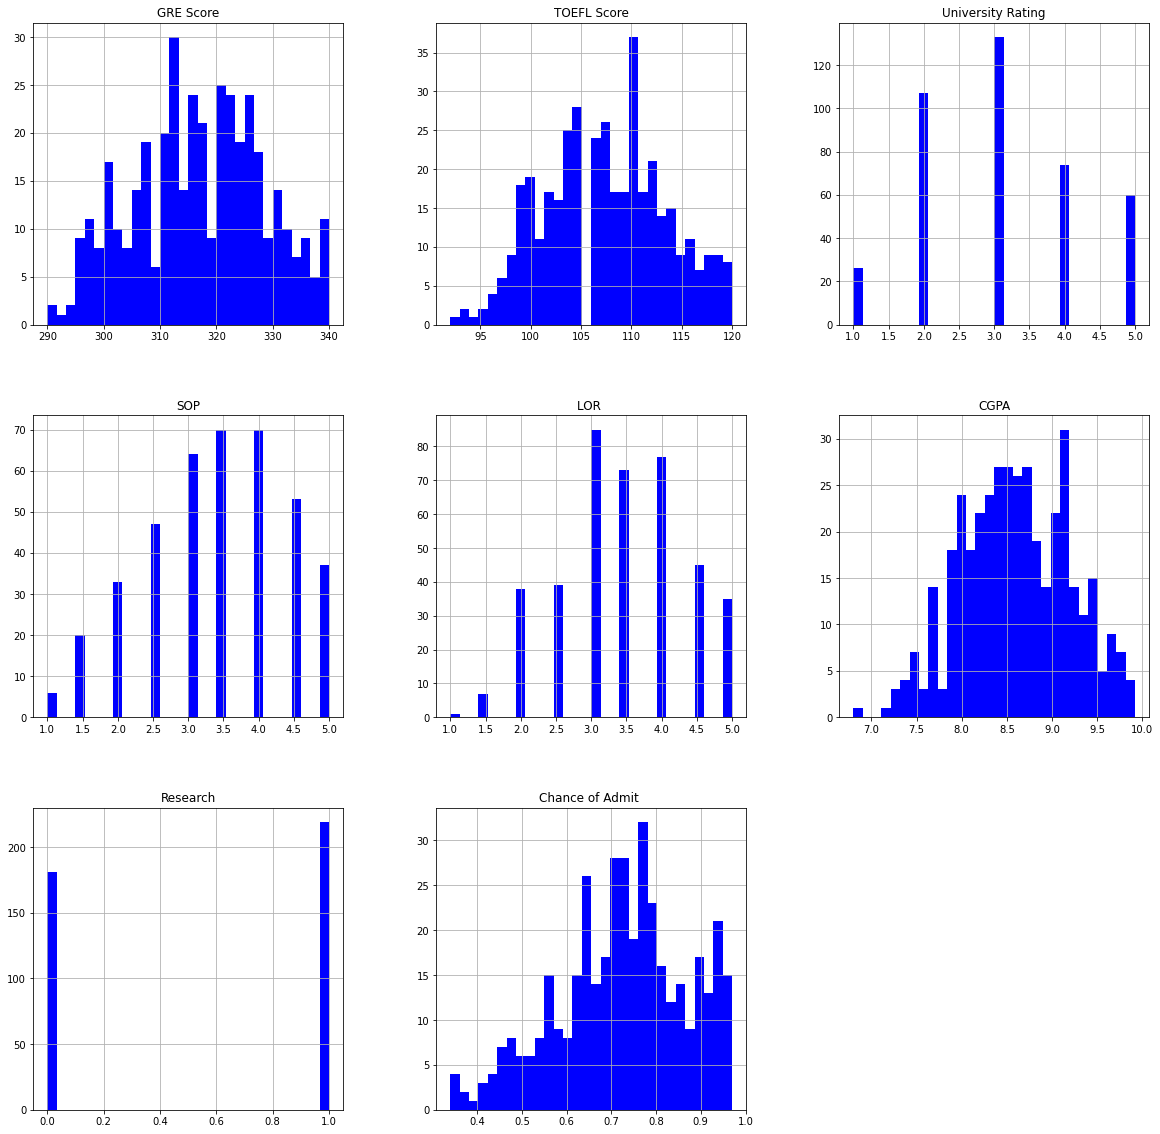

In [ ]:
df.hist(bins = 30, figsize = (20,20), color = 'blue')

# Importing The Required Libraries For Regression Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Split The Dataset Into Dependent Column And Independent Column

In [ ]:
x = df[["GRE Score","TOEFL Score","University Rating","SOP","LOR ","CGPA","Research"]]
y = df["Chance of Admit "]

In [ ]:
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [ ]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

# Spliting The Dataset Into Training And Testing Data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

# Multiple Linear Regression

In [ ]:
multiple_lin_reg = LinearRegression()
multiple_lin_reg.fit(x_train,y_train)

y_pred_mlr = multiple_lin_reg.predict(x_test)

r2_score_mlr = r2_score(y_test,y_pred_mlr)
print("Mutiple Linear Regression's Score = {:.3f}".format(r2_score_mlr))

Mutiple Linear Regression's Score = 0.808


# Random Forest Regression

In [ ]:
ran_for_reg = RandomForestRegressor(n_estimators=100,random_state=1)
ran_for_reg.fit(x_train,y_train)

y_pred_rfr = ran_for_reg.predict(x_test)

r2_score_rfr = r2_score(y_test,y_pred_rfr)
print("Random Forest Regression's Score = {:.3f}".format(r2_score_rfr))

Random Forest Regression's Score = 0.778


# Save The Model In IBM Cloud

In [ ]:
!pip install -U ibm-watson-machine-learning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 7.1 MB/s 
     |████████████████████████████████| 51 kB 665 kB/s 
     |████████████████████████████████| 824 kB 55.5 MB/s 
     |████████████████████████████████| 133 kB 48.4 MB/s 
     |████████████████████████████████| 547 kB 60.8 MB/s 
     |████████████████████████████████| 127 kB 46.6 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.7.0-py2.py3-none-any.whl size=72567 sha256=de538d80586bcfa0a2ffce424d84048f4dfe3b3c450b00b96fac0fb3f573f2bc
  Stored in directory: /root/.cache/pip/wheels/47/22/bf/e1154ff0f5de93cc477acd0ca69abfbb8b799c5b28a66b44c2
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.7.0-py2.py3-none-any.whl size=501011 sha256=426be46b04d6ca28b343a5f93585e97c085aab654bfb38e92cd9e3bcac574952
  Stored in directory: /root/.cache/pip/wheels/6c/a2/e4/c16d02f809a3ea998e17cfd02c13369281f3d232aaf5902c19
  C

In [ ]:
from ibm_watson_machine_learning import APIClient

In [ ]:
wml_credentails={
    "apikey":"g4JuvZj2M_6fsZ9kuPpbaagIVnnKtV5mz05DDPdw9V5E",
    "url":"https://us-south.ml.cloud.ibm.com"
}

In [ ]:
wml_client=APIClient(wml_credentails)
wml_client.spaces.list()

Python 3.7 and 3.8 frameworks are deprecated and will be removed in a future release. Use Python 3.9 framework instead.
Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ------  ------------------------
ID                                    NAME    CREATED
9d004341-8b6f-4dce-89d9-76a239c943c6  models  2022-11-25T08:47:26.566Z
------------------------------------  ------  ------------------------


In [ ]:
space_id="9d004341-8b6f-4dce-89d9-76a239c943c6"

In [ ]:
wml_client.set.default_space(space_id)

'SUCCESS'

In [ ]:
wml_client.software_specifications.list(500)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [ ]:
MODEL_NAME='University Admit Eligibility Predictor88'
DEPLOYMENT_NAME='University Admit Eligibility Predictor'
LINEAR_MODEL=multiple_lin_reg

In [ ]:
#setup python version
software_spec_uid=wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

In [ ]:
#setup for model meta
model_props={
    wml_client.repository.ModelMetaNames.NAME:MODEL_NAME,
    wml_client.repository.ModelMetaNames.TYPE:'scikit-learn_1.0',
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
    
}

In [ ]:
#save the model
models_details=wml_client.repository.store_model(
    model=LINEAR_MODEL,
    meta_props=model_props,
    training_data=x_train,
    training_target=y_train
    
)

In [ ]:
models_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'Chance of Admit ',
  'schemas': {'input': [{'fields': [{'name': 'GRE Score', 'type': 'int64'},
      {'name': 'TOEFL Score', 'type': 'int64'},
      {'name': 'University Rating', 'type': 'int64'},
      {'name': 'SOP', 'type': 'float64'},
      {'name': 'LOR ', 'type': 'float64'},
      {'name': 'CGPA', 'type': 'float64'},
      {'name': 'Research', 'type': 'int64'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-11-26T15:23:40.560Z',
  'id': 'efe722f4-73bd-4705-8e01-907efab51e47',
  'modified_at': '2022-11-26T15:23:43.600Z',
  'name': 'University Admit Eligibility Predictor88',
  'owner': 'IBMid-6630044MVK',
  'resource_key': '4711bf32-1c0c-45da-9208-c850ff0f1b37',
  'space_id': '9d004341-8b6f-4dce-89d9-76a239c943c6'},
 'system': {'warnings':

In [ ]:
model_id = wml_client.repository.get_model_id(models_details)
model_id

'efe722f4-73bd-4705-8e01-907efab51e47'

In [ ]:
# Set meta
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME, 
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}

In [ ]:
# Deploy
deployment = wml_client.deployments.create(
    artifact_uid=model_id, 
    meta_props=deployment_props 
)